# Task 2.11: Regression
## Ridge Regression

In this notebook we are going to implement ridge regression. You will be provided with some already complete code as well as some code that you should complete yourself. In particular, you will have to:

* Complete the function `ridgeRegrNEW(X_train, y_train, alpha,X_test)` to implement ridge regression algorithm.



# Import libraries
The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
import pandas as pd
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


# Load the data
The data we are using is from Boston house-prices dataset, which we can access directly from the scikit learn library . It consists of 506 data points and 13 features.

In [2]:
#add another column that contains the house prices which in scikit learn datasets are considered as target
boston=load_boston() # get the data
#print(boston.keys()) # boston variable itself is a dictionary, so we can check for its keys 
print(boston.data.shape) # shape of data
#print(boston.feature_names)
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names) # convert the boston.data to a a dataframe
boston_df['Price']=boston.target # there is no column called ‘PRICE’ in the data frame because the target column is available in another attribute called target
newX=boston_df.drop('Price',axis=1) # All other features
newY=boston_df['Price'] # Boston Housing Price
boston_df.head()


(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(len(y_train)/len(newX),2),
                                                       round(len(y_test)/len(newX),2)))

train set: 0.0  | test set: 0.0


# Use ridge regression from a library
We will first see how ridge regression can be implemented using already available functions from the scikit-learn library.

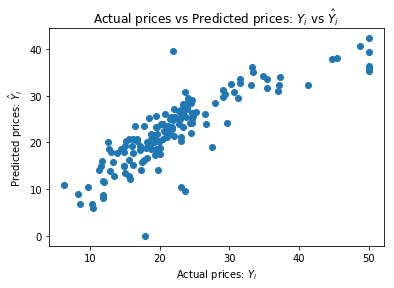

In [4]:
def ridgeRegr(X_train, y_train, X_test):

    #Create linear regression object with a ridge coefficient 0.1
    ridge_regr_model = Ridge(alpha=0.1,fit_intercept=True)
    ridge_regr_model.fit(X_train, y_train) # Fit Ridge regression model


    Y_pred = ridge_regr_model.predict(X_test)
    #print (Y_pred)
    return Y_pred

Y_pred=ridgeRegr(X_train, y_train, X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Actual prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show() #Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line.



# Implement your own ridge regression function

You will be given the `paramEstimate(xTrain, yTrain, alpha)` function estimates the parameters of the ridge regressor.
Remember that ridge regression solves a linear regression problem based on a loss function consisting of the sum of squared error and a regularizer. In particular, the loss function is given by:

\begin{align}
||y - \sum{\beta_j}x_j||^2 + λ\sum{\beta_j}^2
\end{align}



Note: we train on `X_train` and `y_train`!

In [5]:
def paramEstimate(X_train, y_train, alpha):
    n, d = X_train.shape
    I = np.identity(d)
    L = np.dot(alpha, I) + np.dot(X_train.transpose(), X_train)
    L_1 = np.linalg.inv(L)
    w_rr = L_1.dot(X_train.transpose()).dot(y_train)
    return w_rr

def ridgeRegrNEW(xTrain, yTrain, alpha,X_test):
    w_rr=paramEstimate(xTrain, yTrain, alpha)
    #y_pred=...
    return y_pred
   


In [6]:
y_pred = ridgeRegrNEW(X_train, y_train, 0.1,X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


NameError: global name 'y_pred' is not defined

 You can compare the two models using MSE:

In [ ]:
mse = mean_squared_error(y_test, Y_pred) # check the level of error of a model
print('Mean Squared Error (MSE) on test set (built-in model): '+str(mse))
mse2=mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on test set (from scratch model): '+ str(mse2))
